In [2]:
import builtins

In [6]:
# 출력되는 빌트인 함수는 가는 초록색으로 명시됨.
dir(builtins)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIteration',
 'StopIter

In [10]:
sum([1,2,3])

6

In [20]:
all({1,'',3})
# 각각의 데이터가 모두 참인지 검사

False

---

In [35]:
# 반환값 없는 None (== void) / 생략이 가능하다.
def x():
    print(1)
    return None

In [42]:
t = x()
t

1


---
### builtin function 을 잘못 재정의 했을경우

In [47]:
x = sum

In [49]:
x((1,2))

3

In [50]:
sum = 1

In [52]:
%whos

Variable   Type                          Data/Info
--------------------------------------------------
a          list                          n=4
builtins   module                        <module 'builtins' (built-in)>
sum        int                           1
t          NoneType                      None
x          builtin_function_or_method    <built-in function sum>


In [51]:
sum

1

In [53]:
del sum

---
### function 참고

In [131]:
a=5

In [146]:
def xx():
    a = 2     ## 무시됨,,
    def yy():
        global a
        a= a+1
        return a
    return yy()+2

In [142]:
xx()

10

In [102]:
val = 5

In [144]:
### 값이 없으면 펑션 밖에서 값을 찾음. (비추천)
## 값을 찾을 수는 있지만 값을 바꿀수는 없음 (ex. val = val+1) 
# global 선언 시 바꿀수는 있지만 비추천
def func():
    # global val
    # val = val + 1
    return val

In [114]:
func()

5

In [148]:
def outer():
    x = "local"
    
    def inner():
        nonlocal x
        x = "nonlocal"     ## Global scope는 아니고, 함수 한단계 밖을 의미.
        print("inner:", x)
    
    inner()
    print("outer:", x)

outer()

inner: nonlocal
outer: nonlocal


---
## Closure

In [168]:
## closure 기법
def x(n):
    def y(i):
        return i+n
    return y

In [179]:
t = x(3)

In [181]:
t(4)

7

In [184]:
def x(n, *, b):
    def y(a, x=1):
        return a+n+b+x
    return y

In [186]:
x(3,b=1)(2)

7

---

In [187]:
import matplotlib.pyplot as plt

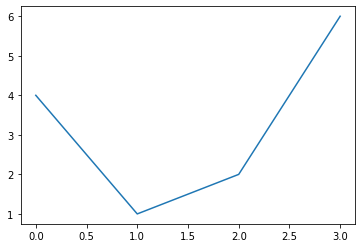

In [199]:
plt.plot((4,1,2,6))

---
## Memory 할당
### is 로 메모리 까지 비교
##### 파이썬에서는 -5~256 까지의 값 메모리를 공유함

In [228]:
a = 257

In [229]:
id(a)

139919168354256

In [230]:
b = 257


In [231]:
id(b)

139919168603024

In [232]:
a==b

True

In [234]:
a is b

False

---
# 대입문 / Unpacking 복습

In [273]:
# Set 은 순서가 없고 자동으로 정렬이 됨. 주의
x, y = {3,1}

In [261]:
x

1

In [271]:
# unpacking 갯수가 다를때 * 로 할당 가능
x,*y = 1,2,3,

In [270]:
y

['b', 'c']

In [274]:
# 딕셔너리는 key 값이 언팩킹 됨
x,*y = {'a':1, 'b':2, 'c':3}

In [275]:
y

['b', 'c']

In [268]:
x,*y = '12345'  # 리스트로 변경됨

In [267]:
y

['2', '3', '4', '5']

In [321]:
*x, = [1,2,3,4,5]

In [319]:
x

[1, 2, 3, 4]

---

In [307]:
def rtn(*a):
    return a

In [308]:
rtn([1,2,3])

([1, 2, 3],)

In [297]:
rtn(*[1,2,3])

(1, 2, 3)

In [298]:
rtn(*{'a':1, 'b':2})

('a', 'b')

---

In [302]:
def rtn2(**b):
    return b

In [324]:
# 딕셔너리 value 까지 언패킹 처리
rtn2(**{'a':1, 'b':2})

{'a': 1, 'b': 2}

---

In [334]:
# 딕셔너리 덮어씌움
x = {'a':1, 'c':2}
y = {'a':5, 'b':3}

In [330]:
z = {**x, **y}

In [331]:
z

{'a': 5, 'c': 2, 'b': 3}

# 예외처리

In [351]:
try:
    1/0
    a = 1
except:
    print('error')    # error 발생 시 실행
else:
    print('success')   # 에러 없이 실행이 됐을때
finally:
    print('end')       # 에러가 나든, 정상 실행 됐던 무조건 실행

error
end
